# Capstone Project Notebook

## Where should you live in Tokyo?

### Import subway stations locations from json to dataframe

In [1]:
import pandas as pd
import numpy as np

import json
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from ibm_botocore.client import Config
import ibm_boto3
from IPython.display import Image, display

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [2]:
# import yurakucyo-line station locations
res_yurakucyo = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-yurakucho.json').json()

# import ginza-line station locations
res_ginza = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-ginza.json').json()

# import hibiya-line station locations
res_hibiya = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-hibiya.json').json()

# import touzai-line station locations
res_touzai = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-touzai.json').json()

# import marunouchi-line station locations
res_marunouchi = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-marunouchi.json').json()

# import chiyoda-line station locations
res_chiyoda = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-chiyoda.json').json()

# import hanzomon-line station locations
res_hanzomon = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-hanzomon.json').json()

# import nanboku-line station locations
res_nanboku = requests.get('https://www.javadrive.jp/google-maps-javascript/data/data/metro-nanboku.json').json()


In [3]:
df_yurakucyo = json_normalize(res_yurakucyo["marker"])
df_ginza = json_normalize(res_ginza["marker"])
df_hibiya = json_normalize(res_hibiya["marker"])
df_touzai = json_normalize(res_touzai["marker"])
df_marunouchi = json_normalize(res_marunouchi["marker"])
df_chiyoda = json_normalize(res_chiyoda["marker"])
df_hanzomon = json_normalize(res_hanzomon["marker"])
df_nanboku = json_normalize(res_nanboku["marker"])

In [4]:
df_metro = df_yurakucyo
print(df_metro.shape)
df_metro = df_metro.append([df_ginza, df_hibiya, df_touzai, df_marunouchi, df_chiyoda, df_hanzomon, df_nanboku])
print(df_metro.shape)

(24, 6)
(165, 6)


In [5]:
df_metro

addr   id        lat         lng  \
0                 å¼ççåå
å¸æ¬çº4-6  Y01  35.788550  139.612337   
1              æ±äº¬é½æ¿æ©åºæå¢2-11-3  Y02  35.776530  139.631510   
2             æ±äº¬é½ç·´é¦¬åºåçº8-37-16  Y03  35.769939  139.644025   
3             æ±äº¬é½ç·´é¦¬åºæ©å®®2-17-48  Y04  35.757860  139.653764   
4          æ±äº¬é½ç·´é¦¬åºæ°·å·å°3-38-18  Y05  35.749545  139.665571   
5          æ±äº¬é½ç·´é¦¬åºå°ç«¹çº2-16-15  Y06  35.743806  139.678580   
6              æ±äº¬é½è±å³¶åºè¦çº3-10-7  Y07  35.738229  139.689274   
7              æ±äº¬é½è±å³¶åºè¦çº1-1-10  Y08  35.733230  139.698718   
8          æ±äº¬é½è±å³¶åºè¥¿æ± è¢3-28-14  Y09  35.728943  139.710388   
9            æ±äº¬é½è±å³¶åºæ±æ± è¢4-4-4  Y10  35.725729  139.719537   
10             æ±äº¬é½æäº¬åºå¤§å¡5-40-8  Y11  35.719046  139.727541   
11             æ±äº¬é½æäº¬åºé¢å£1-19-6  Y12  35.709503  139.733541   
12            æ±äº¬é½æ°å®¿åºç¥æ¥½å1-13  Y13  35.702060  139.745005   
13      æ±äº¬é½æ°å®¿åºå¸è°·ç°çº1ä¸ç®  Y14  35.691043  139.735601   
14             æ±äº¬é½åä»£ç°åºéº¹çº3-2  Y15  35.684002  139.737615   
15      æ±äº¬é½åä»£ç°åºæ°¸ç°çº1-11-28  Y16  35.678764  139.740257   
16        æ±äº¬é½åä»£ç°åºéãé¢2-1-1  Y17  35.677403  139.751493   
17       æ±äº¬é½åä»£ç°åºææ¥½çº1-11-1  Y18  35.675069  139.763332   
18             æ±äº¬é½ä¸­å¤®åºéåº§1-7-12  Y19  35.674346  139.767047   
19              æ±äº¬é½ä¸­å¤®åºç¯å°1-1-1  Y20  35.670458  139.773715   
20              æ±äº¬é½ä¸­å¤®åºæå³¶1-3-9  Y21  35.664869  139.784232   
21              æ±äº¬é½æ±æ±åºè±æ´²4-1-1  Y22  35.654908  139.796219   
22             æ±äº¬é½æ±æ±åºè¾°å·³1-1-44  Y23  35.645584  139.810526   
23             æ±äº¬é½æ±æ±åºæ°æ¨å ´1-6  Y24  35.646157  139.827426   
0              æ±äº¬é½æ¸è°·åºæ¸è°·2-24-3  G01  35.658523  139.701333   
1              æ±äº¬é½æ¸¯åºåéå±±3-6-12  G02  35.665246  139.712317   
2              æ±äº¬é½æ¸¯åºåéå±±2-7-16  G03  35.670532  139.717855   
3              æ±äº¬é½æ¸¯åºåéå±±1-1-19  G04  35.672768  139.724164   
4                  æ±äº¬é½æ¸¯åºèµ¤å3-1-6  G05  35.677021  139.737052   
5        æ±äº¬é½åä»£ç°åºæ°¸ç°çº2-11-1  G06  35.673631  139.741419   
..                                        ...  ...        ...         ...   
3       æ±äº¬é½åä»£ç°åºæ°¸ç°çº1-11-28  Z04  35.678758  139.740260   
4              æ±äº¬é½åä»£ç°åºéº¹çº1-6  Z05  35.685701  139.741631   
5         æ±äº¬é½åä»£ç°åºä¹æ®µå1-6-1  Z06  35.695587  139.751949   
6     æ±äº¬é½åä»£ç°åºç¥ç°ç¥ä¿çº2-2  Z07  35.695495  139.758118   
7         æ±äº¬é½åä»£ç°åºå¤§æçº1-6-1  Z08  35.684801  139.766084   
8      æ±äº¬é½ä¸­å¤®åºæ¥æ¬æ©å®¤çº1-8-1  Z09  35.684886  139.773160   
9   æ±äº¬é½ä¸­å¤®åºæ¥æ¬æ©èæ®»çº2-1-1  Z10  35.682690  139.785380   
10             æ±äº¬é½æ±æ±åºç½æ²³1-6-13  Z11  35.682102  139.798855   
11             æ±äº¬é½æ±æ±åºç¿æ±2-9-10  Z12  35.689067  139.815651   
12          æ±äº¬é½å¢¨ç°åºæ±æ±æ©3-14-6  Z13  35.696436  139.813951   
13             æ±äº¬é½å¢¨ç°åºæ¼ä¸1-1-65  Z14  35.710701  139.812940   
0            æ±äº¬é½åå·åºä¸å¤§å´4-2-1  N01  35.633998  139.715830   
1              æ±äº¬é½æ¸¯åºç½éå°4-5-10  N02  35.637917  139.726138   
2                 æ±äº¬é½æ¸¯åºé«è¼ª1-3-20  N03  35.642907  139.734104   
3            æ±äº¬é½æ¸¯åºéº»å¸åçª4-4-9  N04  35.654681  139.737055   
4               æ±äº¬é½æ¸¯åºå
­æ¬æ¨1-4-1  N05  35.665599  139.738997   
5        æ±äº¬é½åä»£ç°åºæ°¸ç°çº2-11-1  N06  35.673620  139.741424   
6       æ±äº¬é½åä»£ç°åºæ°¸ç°çº1-11-28  N07  35.678760  139.740263   
7                 æ±äº¬é½æ°å®¿åºåè°·1-3  N08  35.686010  139.730671   
8       æ±äº¬é½æ°å®¿åºå¸è°·ç°çº1ä¸ç®  N09  35.691006  139.735588   
9             æ±äº¬é½æ°å®¿åºç¥æ¥

In [6]:
# Remove unnecessary columns
df_metro.drop(['addr','sta','url'],1, inplace=True)
df_metro.reset_index(drop=True, inplace=True)
df_metro

id        lat         lng
0    Y01  35.788550  139.612337
1    Y02  35.776530  139.631510
2    Y03  35.769939  139.644025
3    Y04  35.757860  139.653764
4    Y05  35.749545  139.665571
5    Y06  35.743806  139.678580
6    Y07  35.738229  139.689274
7    Y08  35.733230  139.698718
8    Y09  35.728943  139.710388
9    Y10  35.725729  139.719537
10   Y11  35.719046  139.727541
11   Y12  35.709503  139.733541
12   Y13  35.702060  139.745005
13   Y14  35.691043  139.735601
14   Y15  35.684002  139.737615
15   Y16  35.678764  139.740257
16   Y17  35.677403  139.751493
17   Y18  35.675069  139.763332
18   Y19  35.674346  139.767047
19   Y20  35.670458  139.773715
20   Y21  35.664869  139.784232
21   Y22  35.654908  139.796219
22   Y23  35.645584  139.810526
23   Y24  35.646157  139.827426
24   G01  35.658523  139.701333
25   G02  35.665246  139.712317
26   G03  35.670532  139.717855
27   G04  35.672768  139.724164
28   G05  35.677021  139.737052
29   G06  35.673631  139.741419
..   ...        ...         ...
135  Z04  35.678758  139.740260
136  Z05  35.685701  139.741631
137  Z06  35.695587  139.751949
138  Z07  35.695495  139.758118
139  Z08  35.684801  139.766084
140  Z09  35.684886  139.773160
141  Z10  35.682690  139.785380
142  Z11  35.682102  139.798855
143  Z12  35.689067  139.815651
144  Z13  35.696436  139.813951
145  Z14  35.710701  139.812940
146  N01  35.633998  139.715830
147  N02  35.637917  139.726138
148  N03  35.642907  139.734104
149  N04  35.654681  139.737055
150  N05  35.665599  139.738997
151  N06  35.673620  139.741424
152  N07  35.678760  139.740263
153  N08  35.686010  139.730671
154  N09  35.691006  139.735588
155  N10  35.702071  139.745018
156  N11  35.707340  139.751198
157  N12  35.717637  139.758024
158  N13  35.724148  139.753829
159  N14  35.736487  139.746877
160  N15  35.746007  139.742328
161  N16  35.752475  139.738141
162  N17  35.765175  139.735928
163  N18  35.777951  139.732600
164  N19  35.783424  139.722101

[165 rows x 3 columns]

### Create Tokyo metro stations map 

In [7]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [8]:
# create map of Tokyo using latitude and longitude values
map_metro = folium.Map(location=[latitude, longitude], zoom_start=11)

# add metro stations to map
for lat, lng, station in zip(df_metro['lat'], df_metro['lng'], df_metro['id']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_metro)  
    
map_metro

display map_metro as image

In [11]:
# The code was removed by Watson Studio for sharing.

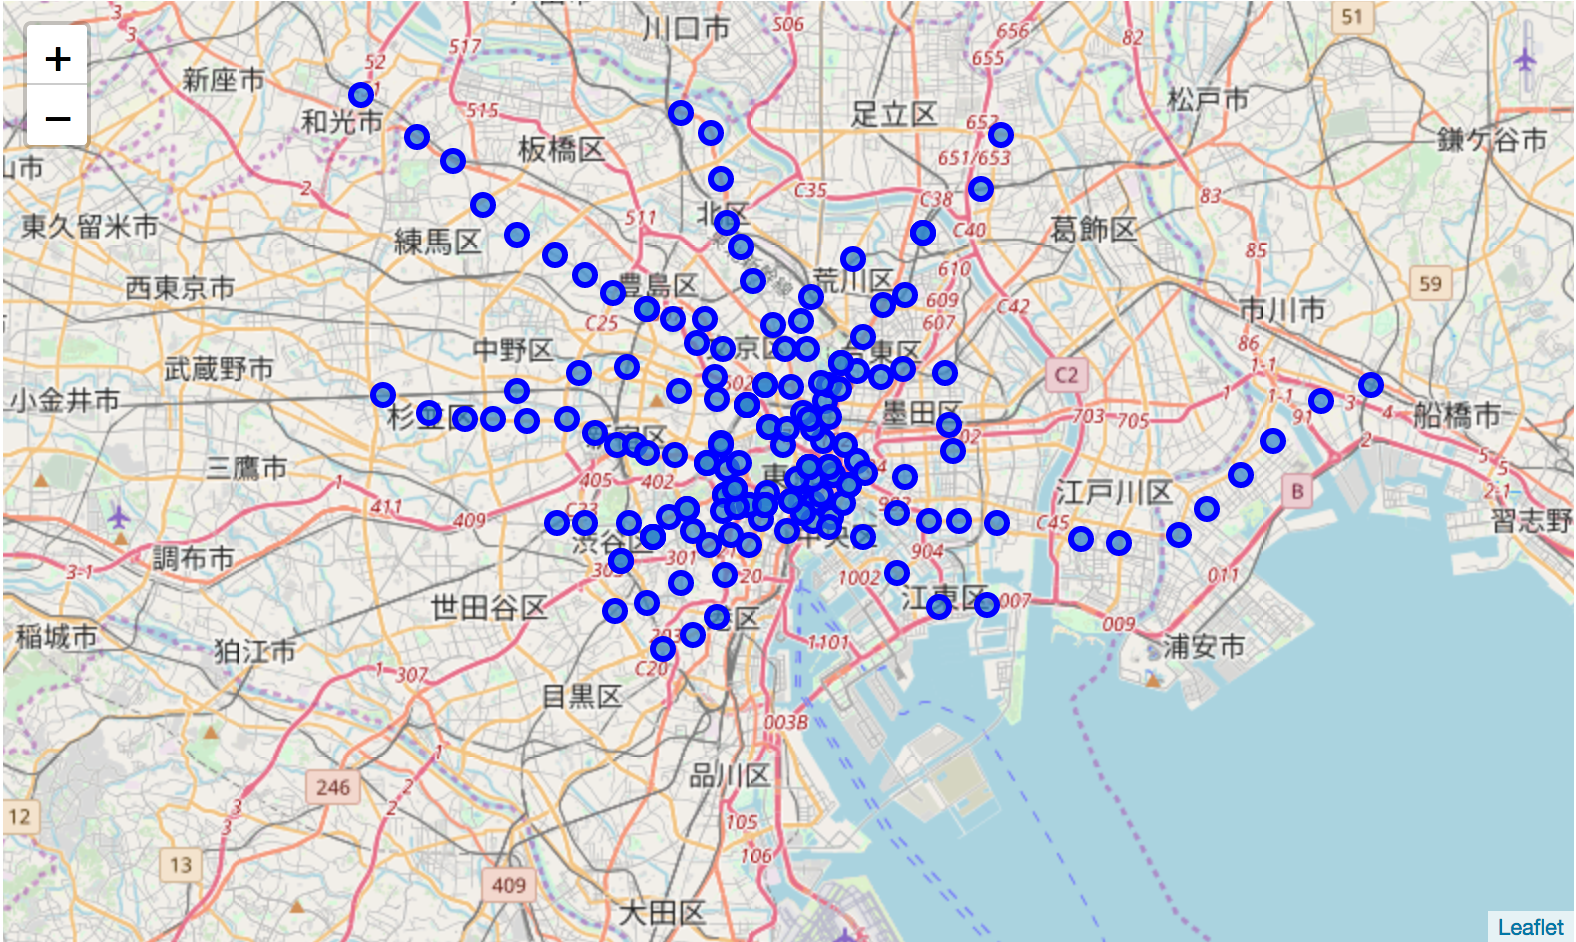

In [12]:
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

filename = 'map_metro.png'
cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)

Image('map_metro.png')

### Define Foursquare Credentials and Version

In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

### Explore the stations

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
metro_venues = getNearbyVenues(names=df_metro['id'],
                                 latitudes=df_metro['lat'],
                                 longitudes=df_metro['lng']
                                 )

Y01
Y02
Y03
Y04
Y05
Y06
Y07
Y08
Y09
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
G01
G02
G03
G04
G05
G06
G07
G08
G09
G10
G11
G12
G13
G14
G15
G16
G17
G18
G19
H01
H02
H03
H04
H05
H06
H07
H08
H09
H10
H11
H12
H13
H14
H15
H16
H17
H18
H19
H20
H21
T01
T02
T03
T04
T05
T06
T07
T08
T09
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
M01
M02
M03
M04
M05
M06
M07
M08
M09
M10
M11
M12
M13
M14
M15
M16
M17
M18
M19
M20
M21
M22
M23
M24
M25
C01
C02
C03
C04
C05
C06
C07
C08
C09
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
C20
Z01
Z02
Z03
Z04
Z05
Z06
Z07
Z08
Z09
Z10
Z11
Z12
Z13
Z14
N01
N02
N03
N04
N05
N06
N07
N08
N09
N10
N11
N12
N13
N14
N15
N16
N17
N18
N19


In [17]:
print(metro_venues.shape)
metro_venues.head()

(12080, 7)


Station  Station Latitude  Station Longitude  \
0     Y01          35.78855         139.612337   
1     Y01          35.78855         139.612337   
2     Y01          35.78855         139.612337   
3     Y01          35.78855         139.612337   
4     Y01          35.78855         139.612337   

                               Venue  Venue Latitude  Venue Longitude  \
0                Gyoza Ohsho (餃子の王将)       35.786717       139.612756   
1                           和光 バルーチョ       35.787530       139.614213   
2                 Adores (アドアーズ 和光店)       35.788313       139.611569   
3  Mister Donut (ミスタードーナツ 和光市駅前ショップ)       35.787699       139.612723   
4  CoCo Ichibanya (CoCo壱番屋 東武和光市駅前店)       35.787767       139.610692   

              Venue Category  
0        Dumpling Restaurant  
1         Seafood Restaurant  
2                     Arcade  
3                 Donut Shop  
4  Japanese Curry Restaurant

In [18]:
metro_venues.groupby('Station').count()

Station Latitude  Station Longitude  Venue  Venue Latitude  \
Station                                                               
C01                    88                 88     88              88   
C02                    55                 55     55              55   
C03                   100                100    100             100   
C04                   100                100    100             100   
C05                    83                 83     83              83   
C06                   100                100    100             100   
C07                    49                 49     49              49   
C08                    59                 59     59              59   
C09                   100                100    100             100   
C10                   100                100    100             100   
C11                   100                100    100             100   
C12                   100                100    100             100   
C13                   100                100    100             100   
C14                    42                 42     42              42   
C15                    52                 52     52              52   
C16                    45                 45     45              45   
C17                    38                 38     38              38   
C18                   100                100    100             100   
C19                    67                 67     67              67   
C20                    41                 41     41              41   
G01                   100                100    100             100   
G02                   100                100    100             100   
G03                    46                 46     46              46   
G04                    60                 60     60              60   
G05                   100                100    100             100   
G06                   100                100    100             100   
G07                   100                100    100             100   
G08                   100                100    100             100   
G09                   100                100    100             100   
G10                   100                100    100             100   
...                   ...                ...    ...             ...   
Y09                   100                100    100             100   
Y10                    35                 35     35              35   
Y11                    27                 27     27              27   
Y12                    51                 51     51              51   
Y13                    96                 96     96              96   
Y14                    61                 61     61              61   
Y15                    91                 91     91              91   
Y16                    65                 65     65              65   
Y17                    43                 43     43              43   
Y18                   100                100    100             100   
Y19                   100                100    100             100   
Y20                   100                100    100             100   
Y21                    85                 85     85              85   
Y22                   100                100    100             100   
Y23                    17                 17     17              17   
Y24                    47                 47     47              47   
Z01                   100                100    100             100   
Z02                   100                100    100             100   
Z03                    60                 60     60              60   
Z04                    65                 65     65              65   
Z05                    81                 81     81              81   
Z06                   100                100    100             100   
Z07                   100                100    100             100   
Z08                   100        

In [19]:
print('There are {} uniques categories.'.format(len(metro_venues['Venue Category'].unique())))

There are 341 uniques categories.


### Analyze each station

In [20]:
# one hot encoding
metro_onehot = pd.get_dummies(metro_venues[['Venue Category']], prefix="", prefix_sep="")

# add station column back to dataframe
metro_onehot['Station'] = metro_venues['Station'] 

# move station column to the first column
fixed_columns = [metro_onehot.columns[-1]] + list(metro_onehot.columns[:-1])
metro_onehot = metro_onehot[fixed_columns]

metro_onehot.head()

Station  ATM  Acai House  Accessories Store  Adult Boutique  \
0     Y01    0           0                  0               0   
1     Y01    0           0                  0               0   
2     Y01    0           0                  0               0   
3     Y01    0           0                  0               0   
4     Y01    0           0                  0               0   

   Afghan Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                  0                    0             0         0       0   
1                  0                    0             0         0       0   
2                  0                    0             0         0       1   
3                  0                    0             0         0       0   
4                  0                    0             0         0       0   

      ...       Wagashi Place  Whisky Bar  Wine Bar  Wine Shop  Wings Joint  \
0     ...                   0           0         0          0            0   
1     ...                   0           0         0          0            0   
2     ...                   0           0         0          0            0   
3     ...                   0           0         0          0            0   
4     ...                   0           0         0          0            0   

   Women's Store  Yakitori Restaurant  Yoga Studio  Yoshoku Restaurant  \
0              0                    0            0                   0   
1              0                    0            0                   0   
2              0                    0            0                   0   
3              0                    0            0                   0   
4              0                    0            0                   0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 342 columns]

In [21]:
metro_onehot.shape

(12080, 342)

Group rows by station and by taking the mean of the frequency of occurrence of each category

In [22]:
metro_grouped = metro_onehot.groupby('Station').mean().reset_index()
metro_grouped

Station       ATM  Acai House  Accessories Store  Adult Boutique  \
0       C01  0.000000        0.00               0.00             0.0   
1       C02  0.000000        0.00               0.00             0.0   
2       C03  0.000000        0.00               0.02             0.0   
3       C04  0.000000        0.00               0.02             0.0   
4       C05  0.000000        0.00               0.00             0.0   
5       C06  0.000000        0.00               0.00             0.0   
6       C07  0.000000        0.00               0.00             0.0   
7       C08  0.000000        0.00               0.00             0.0   
8       C09  0.000000        0.00               0.00             0.0   
9       C10  0.000000        0.00               0.00             0.0   
10      C11  0.000000        0.00               0.00             0.0   
11      C12  0.000000        0.00               0.00             0.0   
12      C13  0.000000        0.00               0.00             0.0   
13      C14  0.000000        0.00               0.00             0.0   
14      C15  0.000000        0.00               0.00             0.0   
15      C16  0.000000        0.00               0.00             0.0   
16      C17  0.000000        0.00               0.00             0.0   
17      C18  0.000000        0.00               0.00             0.0   
18      C19  0.000000        0.00               0.00             0.0   
19      C20  0.000000        0.00               0.00             0.0   
20      G01  0.000000        0.01               0.00             0.0   
21      G02  0.000000        0.00               0.02             0.0   
22      G03  0.000000        0.00               0.00             0.0   
23      G04  0.000000        0.00               0.00             0.0   
24      G05  0.000000        0.00               0.00             0.0   
25      G06  0.000000        0.00               0.00             0.0   
26      G07  0.000000        0.00               0.00             0.0   
27      G08  0.000000        0.00               0.00             0.0   
28      G09  0.000000        0.00               0.00             0.0   
29      G10  0.000000        0.00               0.00             0.0   
..      ...       ...         ...                ...             ...   
135     Y09  0.000000        0.00               0.00             0.0   
136     Y10  0.000000        0.00               0.00             0.0   
137     Y11  0.000000        0.00               0.00             0.0   
138     Y12  0.000000        0.00               0.00             0.0   
139     Y13  0.000000        0.00               0.00             0.0   
140     Y14  0.000000        0.00               0.00             0.0   
141     Y15  0.000000        0.00               0.00             0.0   
142     Y16  0.000000        0.00               0.00             0.0   
143     Y17  0.000000        0.00               0.00             0.0   
144     Y18  0.000000        0.00               0.00             0.0   
145     Y19  0.000000        0.00               0.01             0.0   
146     Y20  0.000000        0.00               0.00             0.0   
147     Y21  0.000000        0.00               0.00             0.0   
148     Y22  0.000000        0.00               0.01             0.0   
149     Y23  0.000000        0.00               0.00             0.0   
150     Y24  0.021277        0.00               0.00             0.0   
151     Z01  0.000000        0.01               0.00             0.0   
152     Z02  0.000000        0.00               0.02             0.0   
153     Z03  0.000000        0.00               0.00             0.0   
154     Z04  0.000000        0.00               0.00             0.0   
155     Z05  0.000000        0.00               0.00             0.0   
156     Z06  0.000000        0.00               0.00             0.0   
157     Z07  0.000000        0.00               0.00             0.0   
158     Z08  0.000000        0.00           

Print each neighborhood along with the top 5 most common venues

In [23]:
num_top_venues = 5

for hood in metro_grouped['Station']:
    print("----"+hood+"----")
    temp = metro_grouped[metro_grouped['Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----C01----
                 venue  freq
0                 Café  0.08
1   Italian Restaurant  0.07
2  Japanese Restaurant  0.07
3    Convenience Store  0.06
4             Sake Bar  0.05


----C02----
                venue  freq
0                Café  0.11
1         Coffee Shop  0.09
2  Italian Restaurant  0.07
3              Bakery  0.07
4      Chocolate Shop  0.05


----C03----
                 venue  freq
0                 Café  0.08
1       Clothing Store  0.06
2     Ramen Restaurant  0.04
3  Sporting Goods Shop  0.04
4      Bubble Tea Shop  0.04


----C04----
                 venue  freq
0                 Café  0.12
1             Boutique  0.10
2  Japanese Restaurant  0.07
3          Coffee Shop  0.05
4         Dessert Shop  0.04


----C05----
                 venue  freq
0  Japanese Restaurant  0.11
1          Art Gallery  0.06
2   Italian Restaurant  0.05
3                 Café  0.05
4          Coffee Shop  0.04


----C06----
                 venue  freq
0  Japanese Restaurant  0

Put this into a pandas dataframe

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
metro_venues_sorted = pd.DataFrame(columns=columns)
metro_venues_sorted['Station'] = metro_grouped['Station']

for ind in np.arange(metro_grouped.shape[0]):
    metro_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metro_grouped.iloc[ind, :], num_top_venues)

metro_venues_sorted.head()

Station 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     C01                  Café    Italian Restaurant   Japanese Restaurant   
1     C02                  Café           Coffee Shop                Bakery   
2     C03                  Café        Clothing Store   Sporting Goods Shop   
3     C04                  Café              Boutique   Japanese Restaurant   
4     C05   Japanese Restaurant           Art Gallery                  Café   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0     Convenience Store              Sake Bar       Soba Restaurant   
1    Italian Restaurant        Chocolate Shop   Japanese Restaurant   
2       Bubble Tea Shop      Ramen Restaurant              Boutique   
3           Coffee Shop          Dessert Shop        Clothing Store   
4    Italian Restaurant                Bakery           Coffee Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Restaurant           Coffee Shop                Bakery   
1                Bistro  Taiwanese Restaurant            Bagel Shop   
2           Coffee Shop       Thai Restaurant            Shoe Store   
3        Cosmetics Shop             Bookstore      Sushi Restaurant   
4    Seafood Restaurant            Steakhouse            Art Museum   

  10th Most Common Venue  
0          Deli / Bodega  
1                    Bar  
2            Event Space  
3        Soba Restaurant  
4           Gourmet Shop

### Cluster Stations

In [26]:
# set number of clusters
kclusters = 6

metro_grouped_clustering = metro_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(metro_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 5, 5, 5, 5, 1, 2, 2, 5, 5], dtype=int32)

In [27]:
# add clustering labels
metro_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [28]:
metro_merged = df_metro

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
metro_merged = metro_merged.join(metro_venues_sorted.set_index('Station'), on='id')

metro_merged.head() 

id        lat         lng  Cluster Labels 1st Most Common Venue  \
0  Y01  35.788550  139.612337               2     Convenience Store   
1  Y02  35.776530  139.631510               2     Convenience Store   
2  Y03  35.769939  139.644025               4     Convenience Store   
3  Y04  35.757860  139.653764               4     Convenience Store   
4  Y05  35.749545  139.665571               4     Convenience Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0              Sake Bar           Supermarket   Japanese Restaurant   
1           Coffee Shop      Ramen Restaurant  Fast Food Restaurant   
2      Ramen Restaurant    Chinese Restaurant             Drugstore   
3          Intersection  Fast Food Restaurant      Ramen Restaurant   
4    Italian Restaurant    Donburi Restaurant           Supermarket   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Intersection                  Café  Fast Food Restaurant   
1    Donburi Restaurant           Supermarket              Sake Bar   
2  Fast Food Restaurant           Supermarket    Donburi Restaurant   
3    Donburi Restaurant           Bus Station              Bus Stop   
4            Bath House     Korean Restaurant         Metro Station   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Arcade              Pharmacy     Italian Restaurant  
1          Noodle House         Grocery Store     Italian Restaurant  
2                Bakery    Italian Restaurant   Gym / Fitness Center  
3          Climbing Gym              Sake Bar             Restaurant  
4  Gym / Fitness Center                   Gym         Farmers Market

In [29]:
metro_merged.rename(columns={'id': 'Station', 'lat': 'Latitude', 'lng': 'Longitude'}, inplace=True)
metro_merged.head() 

Station   Latitude   Longitude  Cluster Labels 1st Most Common Venue  \
0     Y01  35.788550  139.612337               2     Convenience Store   
1     Y02  35.776530  139.631510               2     Convenience Store   
2     Y03  35.769939  139.644025               4     Convenience Store   
3     Y04  35.757860  139.653764               4     Convenience Store   
4     Y05  35.749545  139.665571               4     Convenience Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0              Sake Bar           Supermarket   Japanese Restaurant   
1           Coffee Shop      Ramen Restaurant  Fast Food Restaurant   
2      Ramen Restaurant    Chinese Restaurant             Drugstore   
3          Intersection  Fast Food Restaurant      Ramen Restaurant   
4    Italian Restaurant    Donburi Restaurant           Supermarket   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0          Intersection                  Café  Fast Food Restaurant   
1    Donburi Restaurant           Supermarket              Sake Bar   
2  Fast Food Restaurant           Supermarket    Donburi Restaurant   
3    Donburi Restaurant           Bus Station              Bus Stop   
4            Bath House     Korean Restaurant         Metro Station   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Arcade              Pharmacy     Italian Restaurant  
1          Noodle House         Grocery Store     Italian Restaurant  
2                Bakery    Italian Restaurant   Gym / Fitness Center  
3          Climbing Gym              Sake Bar             Restaurant  
4  Gym / Fitness Center                   Gym         Farmers Market

#### Visualize the resulting clusters

In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(metro_merged['Latitude'], metro_merged['Longitude'], metro_merged['Station'], metro_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

display map_clusters as image

In [31]:
# The code was removed by Watson Studio for sharing.

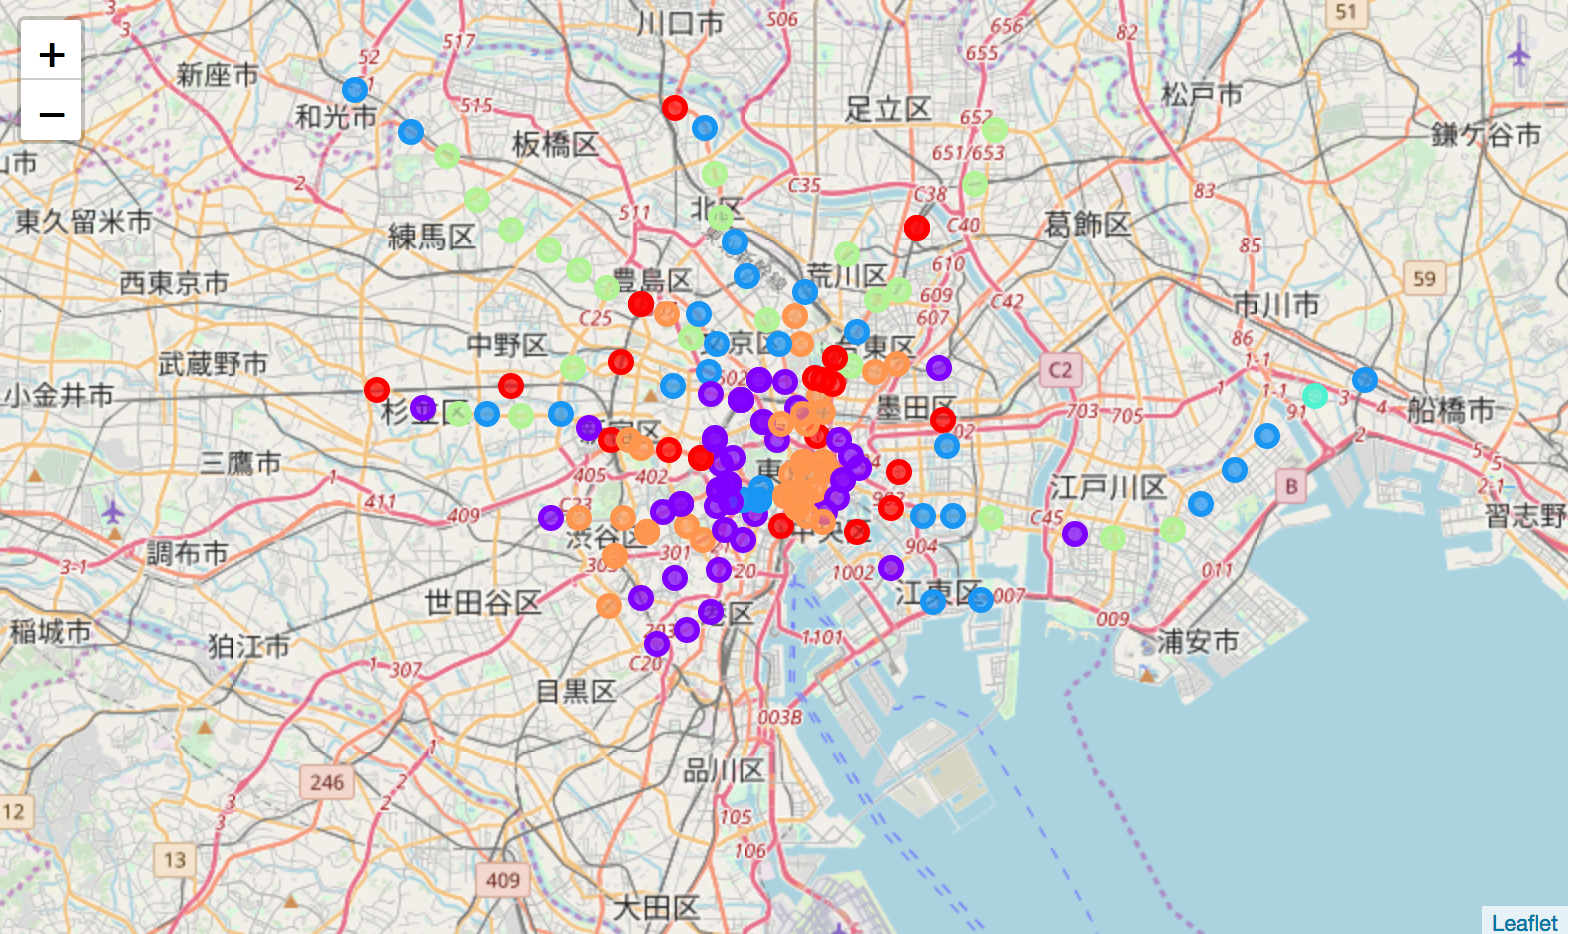

In [32]:
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

filename = 'map_clusters.png'
cos.download_file(Bucket=credentials['BUCKET'],Key=filename,Filename=filename)

Image('map_clusters.png')

In [33]:
metro_merged.groupby('Cluster Labels').count()

Station  Latitude  Longitude  1st Most Common Venue  \
Cluster Labels                                                        
0                    23        23         23                     23   
1                    48        48         48                     48   
2                    29        29         29                     29   
3                     1         1          1                      1   
4                    22        22         22                     22   
5                    42        42         42                     42   

                2nd Most Common Venue  3rd Most Common Venue  \
Cluster Labels                                                 
0                                  23                     23   
1                                  48                     48   
2                                  29                     29   
3                                   1                      1   
4                                  22                     22   
5                                  42                     42   

                4th Most Common Venue  5th Most Common Venue  \
Cluster Labels                                                 
0                                  23                     23   
1                                  48                     48   
2                                  29                     29   
3                                   1                      1   
4                                  22                     22   
5                                  42                     42   

                6th Most Common Venue  7th Most Common Venue  \
Cluster Labels                                                 
0                                  23                     23   
1                                  48                     48   
2                                  29                     29   
3                                   1                      1   
4                                  22                     22   
5                                  42                     42   

                8th Most Common Venue  9th Most Common Venue  \
Cluster Labels                                                 
0                                  23                     23   
1                                  48                     48   
2                                  29                     29   
3                                   1                      1   
4                                  22                     22   
5                                  42                     42   

                10th Most Common Venue  
Cluster Labels                          
0                                   23  
1                                   48  
2                                   29  
3                                    1  
4                                   22  
5                                   42

### Appendix

### Choose the best K

#### Elbow method

In [34]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
%matplotlib inline 

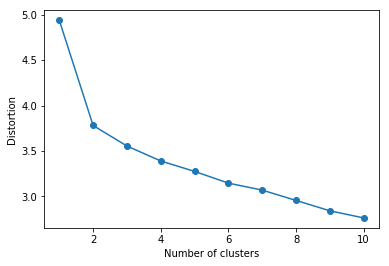

In [35]:
distortions = []

for i  in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(metro_grouped_clustering)                        
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Silhouette score

In [36]:
km = KMeans(n_clusters=3,            # number of clusters
            init='k-means++',        
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

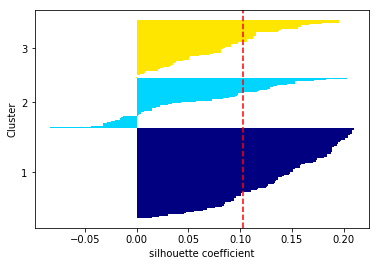

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [38]:
km = KMeans(n_clusters=4,            
            init='k-means++',        
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

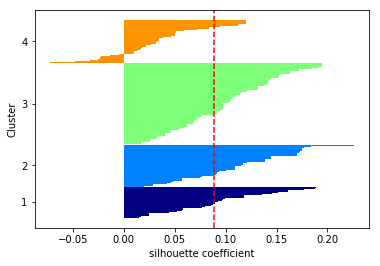

In [39]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [40]:
km = KMeans(n_clusters=5,            
            init='k-means++',       
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

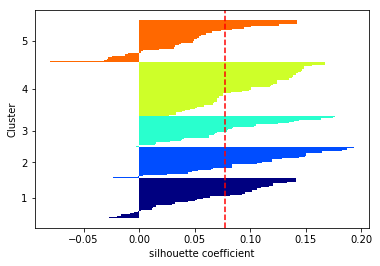

In [41]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [42]:
km = KMeans(n_clusters=6,            
            init='k-means++',  
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

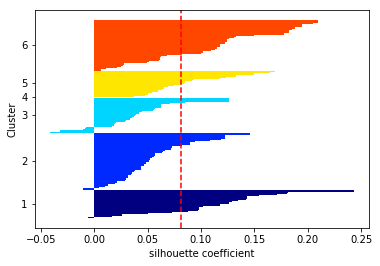

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [44]:
km = KMeans(n_clusters=7,            
            init='k-means++',        
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

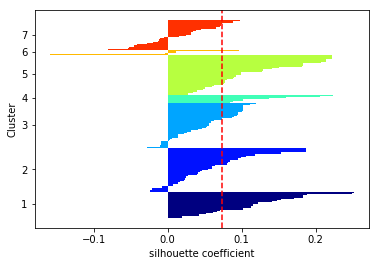

In [45]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [46]:
km = KMeans(n_clusters=8,            
            init='k-means++',        
            n_init=10,               
            max_iter=300,            
            tol=1e-04,               
            random_state=0)          
y_km = km.fit_predict(metro_grouped_clustering)

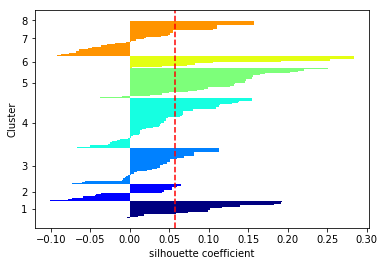

In [47]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # delete duplicate in y_km
n_clusters=cluster_labels.shape[0]     # length of array (n_clusters)

# シルエット係数を計算
silhouette_vals = silhouette_samples(metro_grouped_clustering,y_km,metric='euclidean')  # data, cluster number、metric
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              
        color = cm.jet(float(i)/n_clusters)               
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               
                         height=1.0,                      
                         edgecolor='none',                
                         color=color)                     
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        y_ax_lower += len(c_silhouette_vals)              

silhouette_avg = np.mean(silhouette_vals)                 
plt.axvline(silhouette_avg,color="red",linestyle="--")    
plt.yticks(yticks,cluster_labels + 1)                     
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()